More ideas: month, quarter, day variations can be treated as features to put into model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time_feature_modeling import TimeFeatureModeling
from moving_average import Moving_average

In [2]:
tfm = TimeFeatureModeling()
data = tfm.load_data('../res/cleaned_sampled_data_10000.csv')
prop_ranked = tfm.get_counts_by_prop()
print('prop_id %d has the largest number of records' %prop_ranked[0])
price_by_prop = tfm.agg_by_prop()

def model_time_features(featured_data):
    price_data  = tfm.extract_time_features(featured_data)    
    # plot price data
    tfm.plot_data_trend(featured_data)
    
    print(tfm.agg_by_month(price_data))
    print('--------------------')
    print(tfm.agg_by_day(price_data))
    print('--------------------')
    print(tfm.agg_by_quarter(price_data))
    
    # fit regression model
    tfm.regression_model(price_data)
    
    # fit moving average
    # moving average per property fail because of not enough data
    price_data_indexed = price_data.set_index('date_time')
    ma = Moving_average(price_data_indexed)
    plt.figure(1)
    predictions_MA = ma.fit_MA_model(sliding_window=1)
    plt.figure(2)
    predictions_MA_convert = ma.get_prediction(predictions_MA) 
    return predictions_MA_convert


there are 8518 unique properties
prop_id 116942 has the largest number of records


/Users/liyuan/Desktop/SI699/codes/time_feature_modeling.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  price_data['day'] = price_data['date_time'].apply(lambda x: x.day)
/Users/liyuan/Desktop/SI699/codes/time_feature_modeling.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  price_data['week'] = price_data['date_time'].apply(lambda x: x.week)
/Users/liyuan/Desktop/SI699/codes/time_feature_modeling.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

variance of data: 2592
variance of data: 1745
       price_usd
month           
1        157.000
2        149.000
4         83.380
5        159.405
6        224.000
11       129.530
--------------------
variance of data: 2861
     price_usd
day           
4       61.140
8      108.000
11      81.000
13     195.810
16     103.000
17     157.000
18     195.000
19     224.000
28     126.265
--------------------
variance of data: 97
          price_usd
quarter            
1        151.666667
2        132.158333
4        129.530000
--------------------


KeyError: 'week'

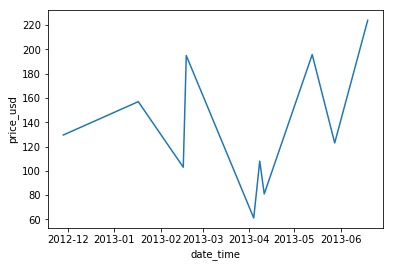

In [3]:
# using property_id = 116942 to model
data_116942 = data[data['prop_id'] == 116942]
predictions_MA_convert = model_time_features(data_116942)
predictions_MA_convert.head()

/Users/liyuan/Desktop/SI699/codes/time_feature_modeling.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


variance of data: 163
variance of data: 28754
        price_usd
month            
1      151.065830
2      153.327209
3      157.925413
4      245.171268
5      672.265902
6      159.668577
11     151.545315
12     153.801898
--------------------
variance of data: 137050
       price_usd
day             
1     152.525467
2     155.793365
3     157.256361
4     145.404196
5     151.083274
6     147.989176
7     155.337822
8     187.865031
9     157.248509
10    144.718968
11    151.708129
12    154.900497
13   2232.085977
14    185.075265
15    145.351860
16    162.793797
17    149.836647
18    148.671775
19    504.603661
20    157.583919
21    150.883586
22    150.794400
23    149.660863
24    157.758401
25    144.174795
26    150.372162
27    149.540444
28    172.040805
29    165.963451
30    161.652218
31    139.890890
--------------------
variance of data: 9300
          price_usd
quarter            
1        154.297207
2        358.043437
4        152.653490
training size: 6400
val

/anaconda3/envs/leetcode/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Insufficient degrees of freedom to estimate

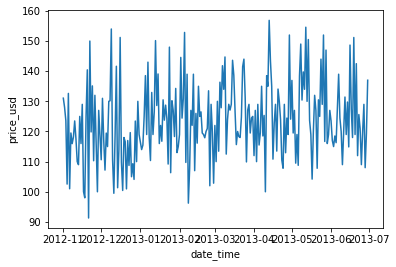

In [70]:
# get price data by destination by starratings (functions below trying to aggregate over prop within the same destination)
# 用一个destination里所有hotel room rate的mean值 --> represent the hotel room rate in this destination 
# --> probablematic, but in terms of buildind codes, it doesn't matter for now, it simply trying to aggregate whatever data you feed into the model 

data_by_dest_by_star = data[['date_time','srch_destination_id','prop_starrating','price_usd']]
predictions = model_time_features(data_by_dest_by_star)
predictions.head()

In [ ]:
# TODO: need to go back to "Moving Average" part to check how it evaluate model (val RMSE and train RMSE)
# ideally it would use previous time's price to train, and validate on later time's price